In [56]:
import sys
print(f"Python Version: {sys.version}")

Python Version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [26]:
import numpy as np 
print(f"Numpy Version: {np.__version__}")

Numpy Version: 1.18.1


In [27]:
import pandas as pd 
print(f"Pandas Version: {pd.__version__}")

Pandas Version: 1.0.3


In [28]:
import sklearn
print(f"Sklearn Version: {sklearn.__version__}")

Sklearn Version: 0.22.1


In [29]:
import matplotlib
print(f"Matplot Version: {matplotlib.__version__}")

Matplot Version: 3.1.3


In [30]:
import scipy as sc
print(f"Scipy Version: {sc.__version__}")

Scipy Version: 1.4.1


In [31]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix

## Loading the dataset using pandas (Titanic dataset)

In [32]:
titanic_dataset = pd.read_csv("titanic.csv",)
titanic_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [33]:
titanic_dataset.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [34]:
print(f"Shape of dataframe: {titanic_dataset.shape}")

Shape of dataframe: (891, 12)


In [36]:
titanic_dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Data Visualisation

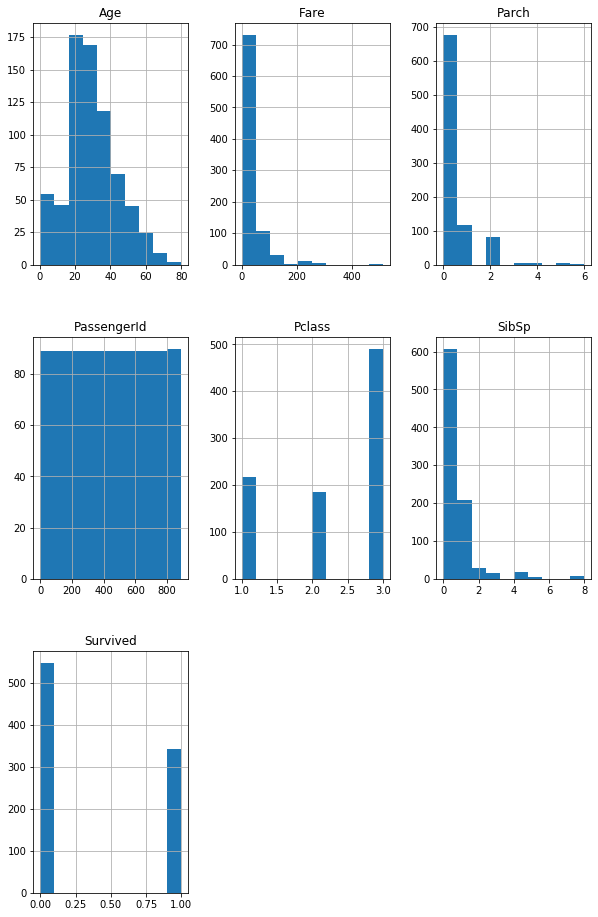

In [37]:
# histogram
titanic_dataset.hist(figsize=(10,16))
plt.show()

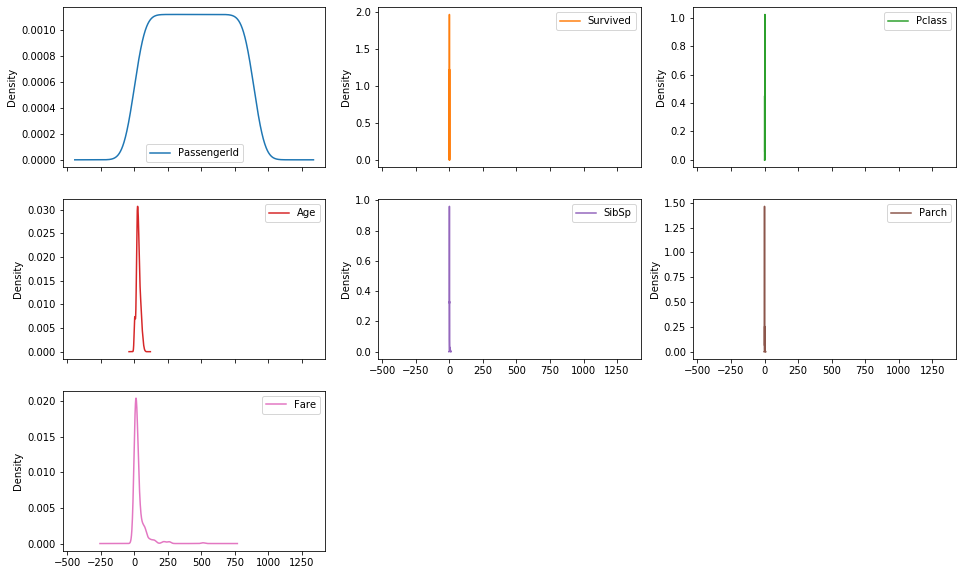

In [38]:
# density plot
titanic_dataset.plot(kind='density',subplots=True,layout=(3,3), sharex=True, figsize=(16,10))
plt.show()

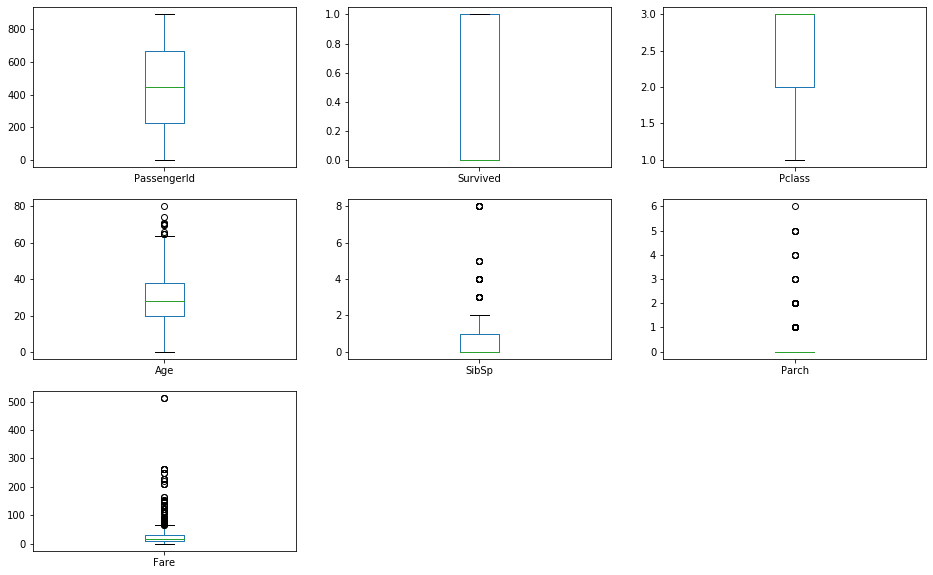

In [39]:
#box plot
titanic_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=True, figsize=(16,10))
plt.show()

In [40]:
correlation = titanic_dataset.corr()
correlation

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

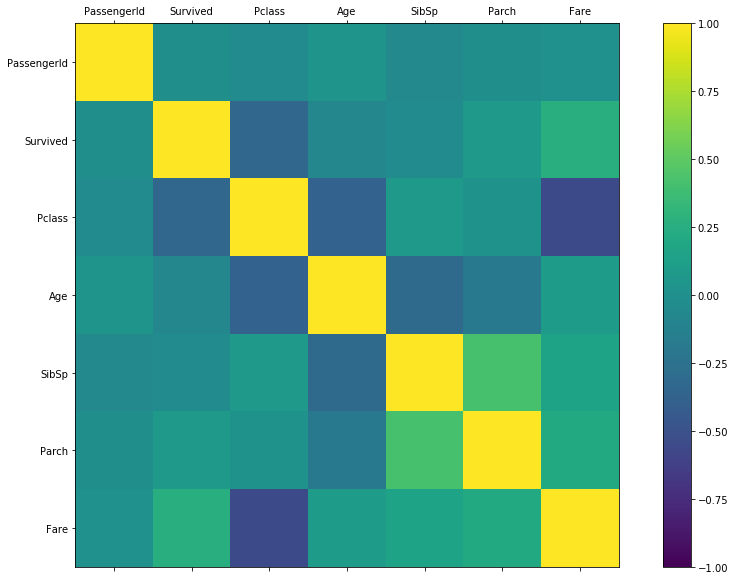

In [41]:
# matshow 
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmax=1, vmin=-1)
fig.colorbar(cax)
label = correlation.columns
ticks = np.arange(len(correlation))
ax.set_xticks(ticks)
ax.set_xticklabels(label)
ax.set_yticks(ticks)
ax.set_yticklabels(label)
plt.show()

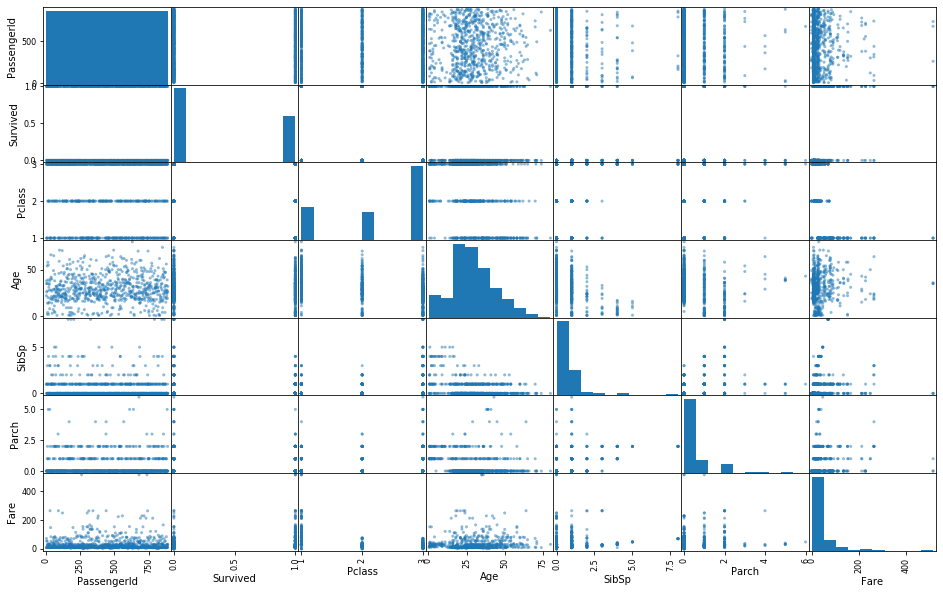

In [42]:
# scatter matrix
scatter_matrix(titanic_dataset, figsize=(16,10))
plt.show()

## Data Preprocessing

In [57]:
# finding the missing values
print(f"Missing Values: \n{titanic_dataset.isna().sum()}")

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [44]:
# missing value treatment
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0])
titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean())

In [45]:
# Feature Generation, total number of family members from SibSp and Parch
family_member = []
for i in range(len(titanic_dataset['Parch'])):
    family_member.append(titanic_dataset['SibSp'][i] + titanic_dataset['Parch'][i] + 1)
family_member = pd.DataFrame({'FamilyMember': family_member})

In [46]:
# Feature Generation, title from Name
title = []
for i in range(len(titanic_dataset.Name)):
    if('Mr.' in titanic_dataset['Name'][i]):
        title.append('Mr')
    elif('Mrs.' in titanic_dataset['Name'][i]):
        title.append('Mrs')
    elif('Master' in titanic_dataset['Name'][i]):
        title.append('Master')
    elif('Miss.' in titanic_dataset['Name'][i]):
        title.append('Miss')
    elif('Dr.' in titanic_dataset['Name'][i]):
        title.append('Dr')
    elif('Rev.' in titanic_dataset['Name'][i]):
        title.append('Rev')
    else:
        title.append('Mr')
title = pd.DataFrame({'Title': title})

In [47]:
# splitting the data into feature and target variable
X = titanic_dataset.iloc[:,[2, 4, 5]]
Y = titanic_dataset.iloc[:,1].values

In [48]:
X= pd.concat([X,family_member, title], axis=1)
X = pd.get_dummies(X).values

In [49]:
# splitting the dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , train_size=0.3, random_state=11)

## Train the model

In [50]:
# training the model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test the model

In [51]:
# testing the model
Y_pred = model.predict(X_test)

In [52]:
accuracy_score(Y_test, Y_pred)

0.8317307692307693

In [53]:
# confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[347,  39],
       [ 66, 172]], dtype=int64)

In [54]:
# classification report
print(classification_report(Y_test, Y_pred))

precision    recall  f1-score   support

           0       0.84      0.90      0.87       386
           1       0.82      0.72      0.77       238

    accuracy                           0.83       624
   macro avg       0.83      0.81      0.82       624
weighted avg       0.83      0.83      0.83       624



## Use the model

In [55]:
# usning the model
Pclass = int(input("Enter Pclass"))
age = float(input("Enter age"))
family_member = int(input("Enter number of family members"))

sex_male=0
sex_female=0
sex = input("Enter sex")
if(sex=='male'):
    sex_male=1
elif(sex=='female'):
    sex_female=1

Title_Dr=0
Title_Master=0
Title_Miss=0
Title_Mr=0
Title_Mrs=0
Title_Rev=0
title = input("Enter title")
if(title == 'Dr'):
    Title_Dr=1
elif(title == 'Master'):
    Title_Master=1
elif(title == 'Miss'):
    Title_Miss=1
elif(title == 'Mr'):
    Title_Mr=1
elif(title == 'Mrs'):
    Title_Mrs=1
elif(title == 'Rev'):
    Title_Rev=1    

X_input = [[Pclass,age,family_member, sex_female, sex_male,Title_Dr, Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev]]
output =  model.predict(X_input)
if(output == 1):
    print(X_input, ': Passenger Survived')
else:
    print(X_input, ': Passenger Not Survived')

[[1, 45.0, 2, 0, 0, 0, 0, 0, 0, 1, 0]] : Passenger Survived
